# Desafios da aula02

### Preparando os datasets

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baixando o dataset "movies.csv" e armazenando em uma variável
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

# Trocando os nomes das colunas
filmes.columns = ['filmeId', 'titulo', 'generos']

# Mostrando o DataFrame "filmes"
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
# Baixando o dataset "ratings.csv" e armazenando em uma variável
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")

# Trocando os nomes das colunas
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

# Mostrando o DataFrame "rating.csv"
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# Calculando as médias das notas por filme
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()

# Juntando os DataFrames "filmes_com_medias" e "filmes"
medias_filmes = filmes.join(notas_medias_por_filme, on='filmeId')

# Renomeando a coluna "nota" para "nota_media"
medias_filmes = medias_filmes.rename(columns={'nota': 'nota_media'})

# Calculando o total de votos por filme
total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count()

# Juntando os DataFrames "filmes_com_medias" e "total_votos_por_filme"
medias_filmes = medias_filmes.join(total_votos_por_filme, on='filmeId')

# Renomeando a coluna "nota" para "total_votos"
medias_filmes = medias_filmes.rename(columns={'nota': 'total_votos'})

# Arredondando para duas casas decimais as médias da coluna "nota_media"
medias_filmes['nota_media'] = medias_filmes['nota_media'].round(4)

# Calculando o total de filmes por de gêneros
generos = pd.Series(medias_filmes.generos.str.get_dummies().sum().sort_values(ascending=False))

# Criando uma nova coluna chamada "ano" feature engineering (?)
medias_filmes['ano'] = medias_filmes['titulo'].str.extract("\((\d{4})\)")

# Mostrando parte do DataFrame
medias_filmes.head()

,filmeId,titulo,generos,nota_media,total_votos,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.9209,215.0,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.4318,110.0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.2596,52.0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.3571,7.0,1995
4,5,Father of the Bride Part II (1995),Comedy,3.0714,49.0,1995


# Desafio 1
Rotacionar os thicks (os nomes dos generos) do gráfico de barras (da última aula), de forma a deixar as legendas mais legíveis.


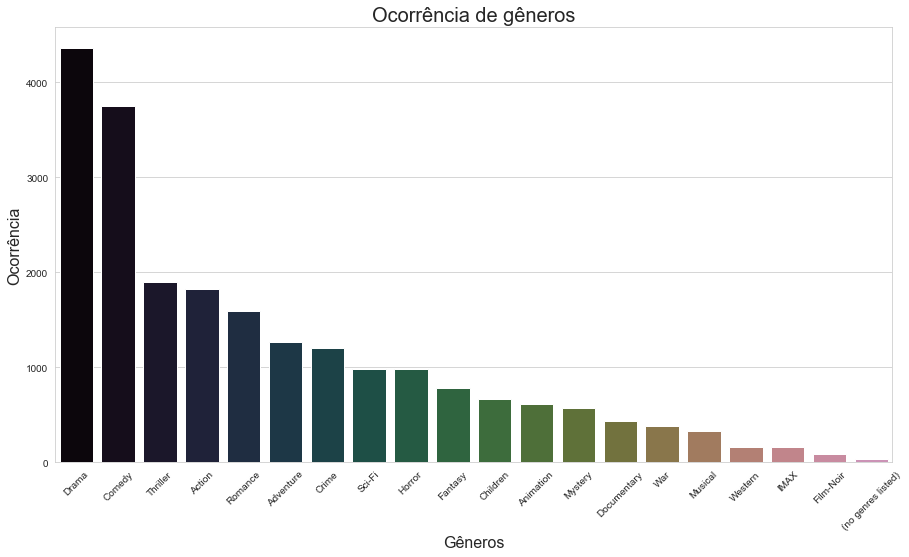

In [4]:
# Setando o estilo
sns.set_style('whitegrid')

# Tamanho da segunda figura
plt.figure(figsize=(15, 8))

# Plotando o gráfico de barra com a seaborn
sns.barplot(x=generos.index, y=generos.values, 
            palette=sns.color_palette("cubehelix", n_colors=len(generos) + 10))

# Definindo o título
plt.title('Ocorrência de gêneros', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel("Gêneros", fontsize=16)

# Definindo o eixo vertical
plt.ylabel("Ocorrência", fontsize=16)

# Rotacionando os gêneros em 45°
plt.xticks(rotation=45)

plt.show()

# Desafio 2
Encontar vários filmes com médias próximas e distribuições diferentes, use uma função para plotar histograma e boxplot.


Filme ==> Toy Story (1995)

Média de notas ==> 3.92



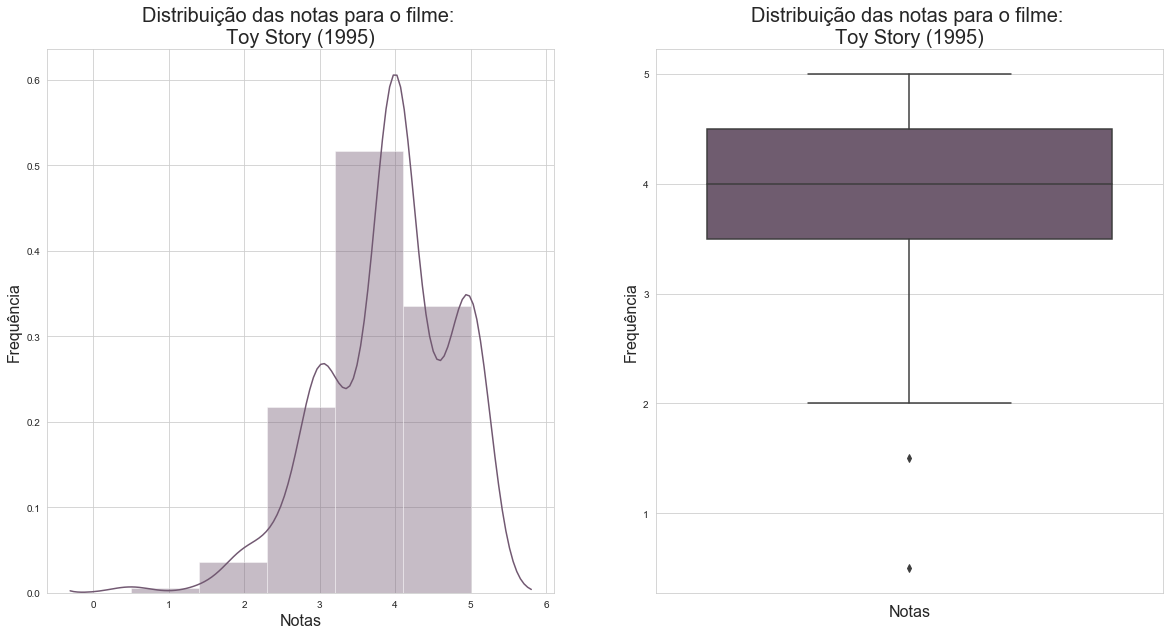

In [5]:
# Criando uma função para plotar os gráficos de histograma e boxplot de filmes pelo seu Id
def plot_hist_box_filme(filmeId):
    
    # Preparação de um cabeçalho para o filme
    notas_do_filme = avaliacoes.query(f"filmeId=={filmeId}")["nota"]
    titulo = filmes.query(f'filmeId == {filmeId}')['titulo']
    
    # Mostrando o cabeçalho
    print('Filme ==> {}\n\nMédia de notas ==> {:.2f}'.format(titulo.values[0], notas_do_filme.mean()))
    print()

    # Setando o tamanho da primeira figura
    plt.figure(figsize=(20,10))
    
    # Mostrando o hitograma
    plt.subplot(1,2,1)
    sns.distplot(notas_do_filme, vertical=False, bins=5, color="#725972")
    
    # Definindo o título do hitograma
    plt.title(f'Distribuição das notas para o filme: \n{titulo.values[0]}', fontsize=20)
    
    # Definindo o eixo horizontal do hitograma
    plt.xlabel("Notas", fontsize=16)
    
    # Definindo o eixo vertical do hitograma
    plt.ylabel("Frequência", fontsize=16)
    
    # Mostrando o boxplot
    plt.subplot(1,2,2)
    sns.boxplot(notas_do_filme, orient='v', color='#725972')
    
    # Definindo o título do boxplot
    plt.title(f'Distribuição das notas para o filme: \n{titulo.values[0]}', fontsize=20)
    
    # Definindo o eixo horizontal do boxplot
    plt.xlabel("Notas", fontsize=16)
    
    # Definindo o eixo vertical do boxplot
    plt.ylabel("Frequência", fontsize=16)
    plt.show()
    return

# Chamando a função "plot_hist_box_filme()"
plot_hist_box_filme(1)

In [6]:
def plot_box_10_filmes_notas_proximas(lista):
    
    # Criando a lista "nomes" vazia
    titulos = []
    
    # Laço para gerar uma lista com os nomes dos filmes a aprtir de seus respsctivos Id's
    for indice in range(len(lista)):
        
        # Criando uma "boolean mask"
        selecao = medias_filmes['filmeId'] == lista[indice]
        
        # Encontrando o nome de filme
        titulo = medias_filmes[selecao]['titulo'].values[0]
        
        # Adicionando o nome do filme na lista "nomes"
        titulos.append(titulo)
    
    # Criando uma DataFrame com "título", "filmeId" e "nota"
    filmes_com_notas = filmes.merge(avaliacoes[['nota', 'filmeId']], how='outer', on='filmeId')
    
    # Setando o tamanho da figura
    plt.figure(figsize=(20,10))
    
    # Plotando os boxoplots das notas por flime selecionado
    sns.boxplot(data = filmes_com_notas.query(f"titulo in {titulos}"), x ="titulo", 
                y="nota", palette=['#7710AA', '#8722A0', '#8821BB', '#9833B1', '#9932CC',
                                   '#A944C2','#AA43DD', '#BA55D3', '#CB66E4', '#DC77F5'
                                  ])

    # Definindo o título do boxplot
    plt.title('Boxplot das notas para filmes com médias próximas', fontsize=24)
    
    # Definindo o eixo horizontal do boxplot
    plt.xlabel("Notas", fontsize=18)
    
    plt.xticks(fontsize=14, rotation=75)
    
    # Definindo o eixo vertical do boxplot
    plt.ylabel("Frequência", fontsize=18)
    
    print('Os filmes selecionados são: ')
    for titulo in titulos:
        print(f'==> {titulo}')
    return

In [7]:
# Selecionando uma lista de filmes com médias de avaliação próximas
lista_10_medias_proximas = medias_filmes.query("nota_media<3.9").sort_values("nota_media", ascending=False).head(10)

# Amazenando os Id's desses filmes em uma lista
lista_10_medias_proximas = list(lista_10_medias_proximas['filmeId'])

Os filmes selecionados são: 
==> No Country for Old Men (2007)
==> Terminator, The (1984)
==> Three Colors: Blue (Trois couleurs: Bleu) (1993)
==> Wallace & Gromit: A Close Shave (1995)
==> 2001: A Space Odyssey (1968)
==> Sixth Sense, The (1999)
==> Eat Drink Man Woman (Yin shi nan nu) (1994)
==> Limey, The (1999)
==> Saved! (2004)
==> Gods Must Be Crazy, The (1980)


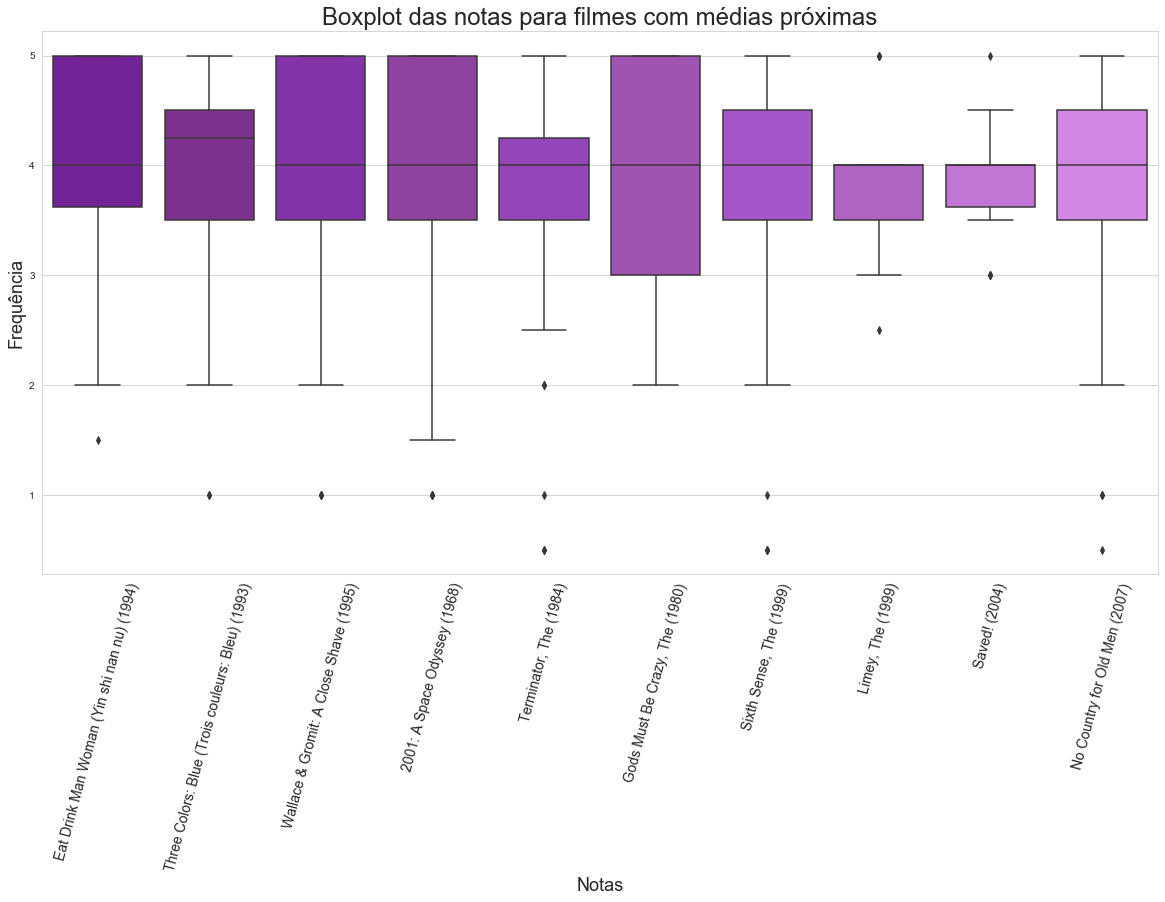

In [8]:
plot_box_10_filmes_notas_proximas(lista_10_medias_proximas)

# Desafio 3 e 4
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!).

Configurar a visualização do boxplot gerado pelo seaborn. Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [9]:
def plot_box_10_filmes_com_mais_notas(lista):
    
    # Criando a lista "nomes" vazia
    titulos = []
    
    # Laço para gerar uma lista com os nomes dos filmes a aprtir de seus respsctivos Id's
    for indice in range(len(lista)):
        
        # Criando uma "boolean mask"
        selecao = medias_filmes['filmeId'] == lista[indice]
        
        # Encontrando o nome de filme
        titulo = medias_filmes[selecao]['titulo'].values[0]
        
        # Adicionando o nome do filme na lista "nomes"
        titulos.append(titulo)
    
    # Criando uma DataFrame com "título", "filmeId" e "nota"
    filmes_com_notas = filmes.merge(avaliacoes[['nota', 'filmeId']], how='outer', on='filmeId')
    
    # Setando o tamanho da figura
    plt.figure(figsize=(20,10))
    
    # Plotando os boxoplots das notas por flime selecionado
    sns.boxplot(data = filmes_com_notas.query(f"titulo in {titulos}"), x ="titulo", 
                y="nota", palette=['#10AA77', '#22A087', '#21BB88', '#33B198', '#32CC99',
                                   '#44C2A9','#43DDAA', '#55D3BA', '#66E4CB', '#77F5DC'
                                  ])

    # Definindo o título do boxplot
    plt.title('Boxplot das notas para os 10 filmes com maior número de votos', fontsize=24)
    
    # Definindo o eixo horizontal do boxplot
    plt.xlabel("Notas", fontsize=18)
    
    plt.xticks(fontsize=14, rotation=75)
    
    # Definindo o eixo vertical do boxplot
    plt.ylabel("Frequência", fontsize=18)
    
    print('Os filmes selecionados são: ')
    for titulo in titulos:
        print(f'==> {titulo}')
    return

Os filmes selecionados são: 
==> Forrest Gump (1994)
==> Shawshank Redemption, The (1994)
==> Pulp Fiction (1994)
==> Silence of the Lambs, The (1991)
==> Matrix, The (1999)
==> Star Wars: Episode IV - A New Hope (1977)
==> Jurassic Park (1993)
==> Braveheart (1995)
==> Terminator 2: Judgment Day (1991)
==> Schindler's List (1993)


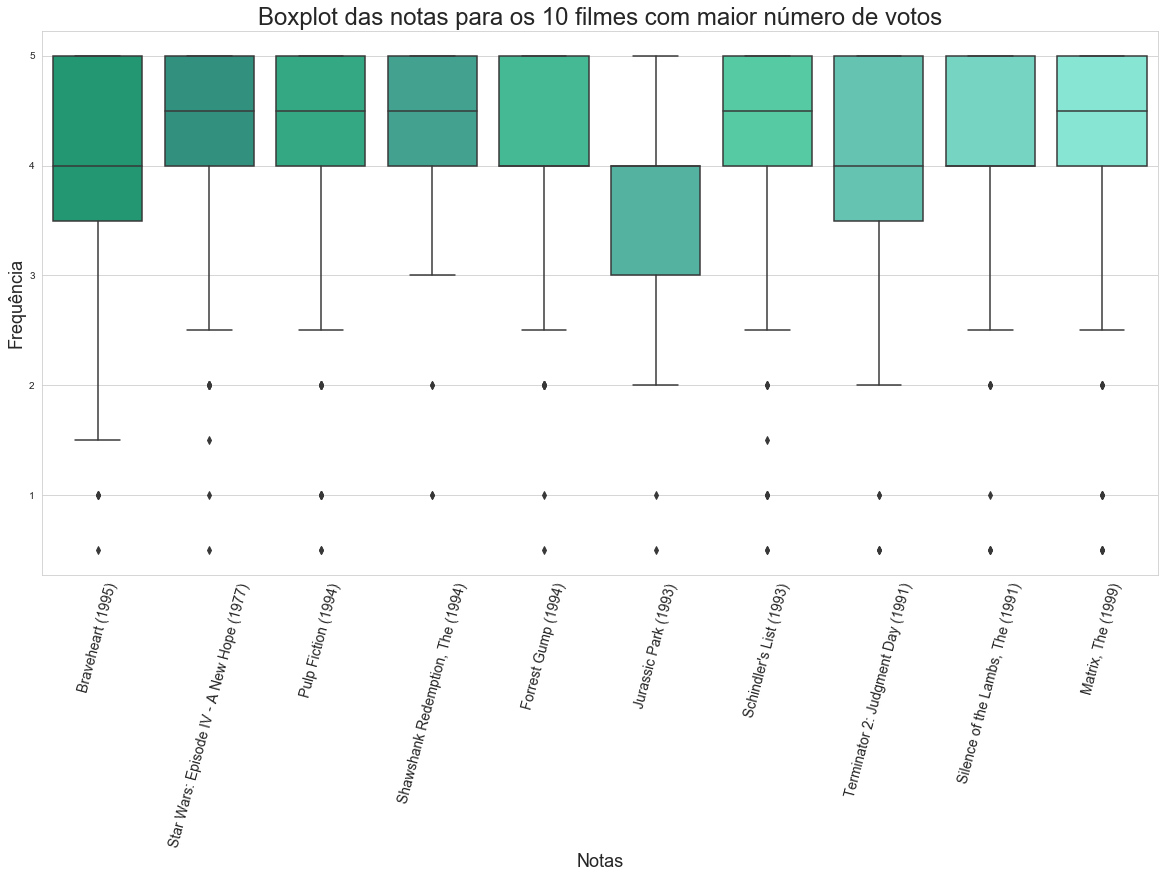

In [10]:
# Selecionando filmes com maior número de votos
top_10_votos_por_filme = medias_filmes.sort_values(by='total_votos', ascending=False).head(10)

# Armazenando em uma lista
lista_Id_top_10_votos = list(top_10_votos_por_filme['filmeId'])

# Chamando a função plot_box_10_filmes_com_mais_notas
plot_box_10_filmes_com_mais_notas(lista_Id_top_10_votos)

# Desafio 5
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [11]:
# Define a função explora_filme() que mostra uma exploração das medidas de tendência central das notas de detreminados filmes
def explora_filme(lista):
    
    # Laço para explorar varios filmes a partir de seu Id
    for filme_id in lista:
        
        # Seleciona o filme
        filme = filmes.query(f'filmeId == {filme_id}')
        
        # Seleciona as notas do filme
        notas = avaliacoes.query(f'filmeId == {filme_id}')['nota']
        
        # Mostra a exploração
        print('------------')
        print(f'Filme: {filme.iloc[0, 1]}')
        print('Moda: {:.2f}'.format(notas.mode().values[0]))
        print('Média: {:.2f}'.format(notas.mean()))
        print('Mediana: {:.2f}'.format(notas.median()))
        print('------------')
    return

In [12]:
# Seleciona alguns filmes com notas médias em torno de 0.5 usando uma boolean mask
boolean_mask = medias_filmes['nota_media'].between(left=0.25, right=.75)
em_torno_de_meio = list(medias_filmes[boolean_mask]['filmeId'].head())

# Mostra a exploração das medidas de tendência central
explora_filme(em_torno_de_meio)

------------
Filme: Amityville Curse, The (1990)
Moda: 0.50
Média: 0.75
Mediana: 0.75
------------
------------
Filme: Gypsy (1962)
Moda: 0.50
Média: 0.50
Mediana: 0.50
------------
------------
Filme: House Party 2 (1991)
Moda: 0.50
Média: 0.75
Mediana: 0.75
------------
------------
Filme: Killer Shrews, The (1959)
Moda: 0.50
Média: 0.50
Mediana: 0.50
------------
------------
Filme: Horrors of Spider Island (Ein Toter Hing im Netz) (1960)
Moda: 0.50
Média: 0.50
Mediana: 0.50
------------


In [13]:
# Seleciona alguns filmes com notas médias em torno de 3.0 usando uma boolean mask
boolean_mask = medias_filmes['nota_media'].between(left=2.75, right=3.25)
entorno_de_tres = list(medias_filmes[boolean_mask]['filmeId'].head())

# Mostra a exploração das medidas de tendência central
explora_filme(entorno_de_tres)

------------
Filme: Father of the Bride Part II (1995)
Moda: 3.00
Média: 3.07
Mediana: 3.00
------------
------------
Filme: Sabrina (1995)
Moda: 3.00
Média: 3.19
Mediana: 3.00
------------
------------
Filme: Tom and Huck (1995)
Moda: 3.00
Média: 2.88
Mediana: 3.00
------------
------------
Filme: Sudden Death (1995)
Moda: 3.00
Média: 3.12
Mediana: 3.00
------------
------------
Filme: Balto (1995)
Moda: 3.00
Média: 3.12
Mediana: 3.00
------------


In [14]:
# Seleciona alguns filmes com notas médias iguais a 5 usando uma boolean mask
boolean_mask = medias_filmes['nota_media'] == 5
com_cinco_de_media = list(medias_filmes[boolean_mask]['filmeId'].head())

# Mostra a exploração das medidas de tendência central
explora_filme(com_cinco_de_media)

------------
Filme: Lamerica (1994)
Moda: 5.00
Média: 5.00
Mediana: 5.00
------------
------------
Filme: Heidi Fleiss: Hollywood Madam (1995)
Moda: 5.00
Média: 5.00
Mediana: 5.00
------------
------------
Filme: Awfully Big Adventure, An (1995)
Moda: 5.00
Média: 5.00
Mediana: 5.00
------------
------------
Filme: Live Nude Girls (1995)
Moda: 5.00
Média: 5.00
Mediana: 5.00
------------
------------
Filme: In the Realm of the Senses (Ai no corrida) (1976)
Moda: 5.00
Média: 5.00
Mediana: 5.00
------------


# Desafio 6
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

Filme ==> Fantastic Fear of Everything, A (2012)

Média de notas ==> 4.00



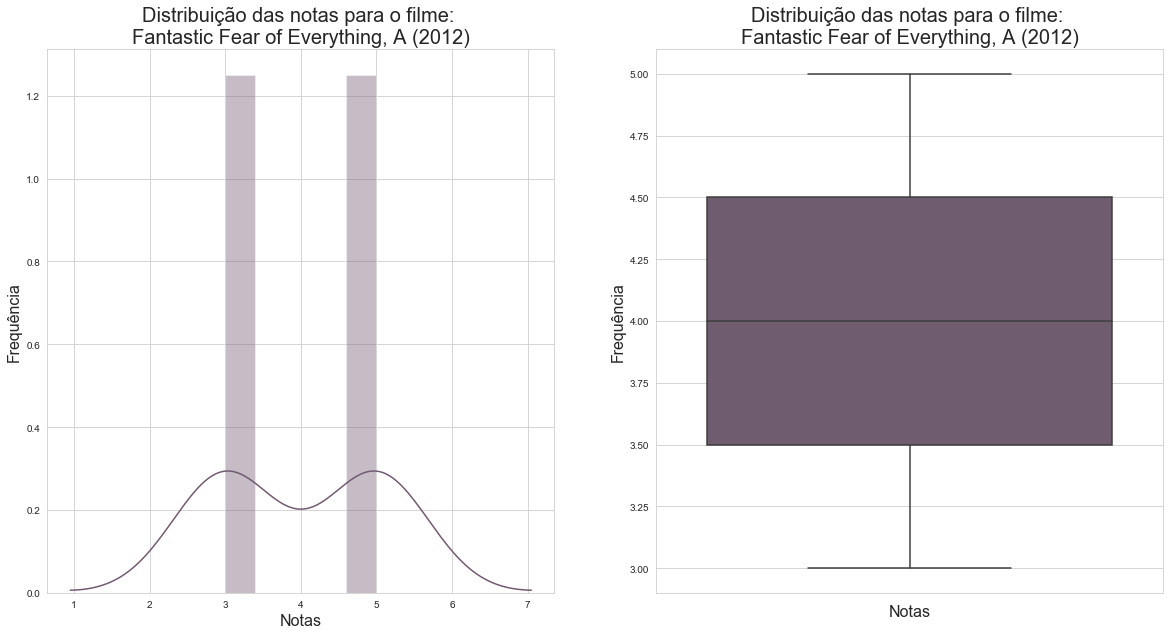

In [15]:
# Importando as bibliotecas necessárias
import random
import warnings

# Filtrando warnings
warnings.simplefilter("ignore")

# Gerando um Id aleatório
id_aleatorio = random.choice(medias_filmes['filmeId'])

# Chamando a função plot_hist_box_filme()
plot_hist_box_filme(id_aleatorio)

# Desafio 7
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).


In [16]:
filmes_com_ano = medias_filmes.copy()
filmes_com_ano['ano'].dropna(inplace=True)
filmes_com_ano['ano'] = filmes_com_ano['ano'].apply(lambda x: int(x))
filmes_com_ano.head()

,filmeId,titulo,generos,nota_media,total_votos,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.9209,215.0,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.4318,110.0,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.2596,52.0,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.3571,7.0,1995.0
4,5,Father of the Bride Part II (1995),Comedy,3.0714,49.0,1995.0


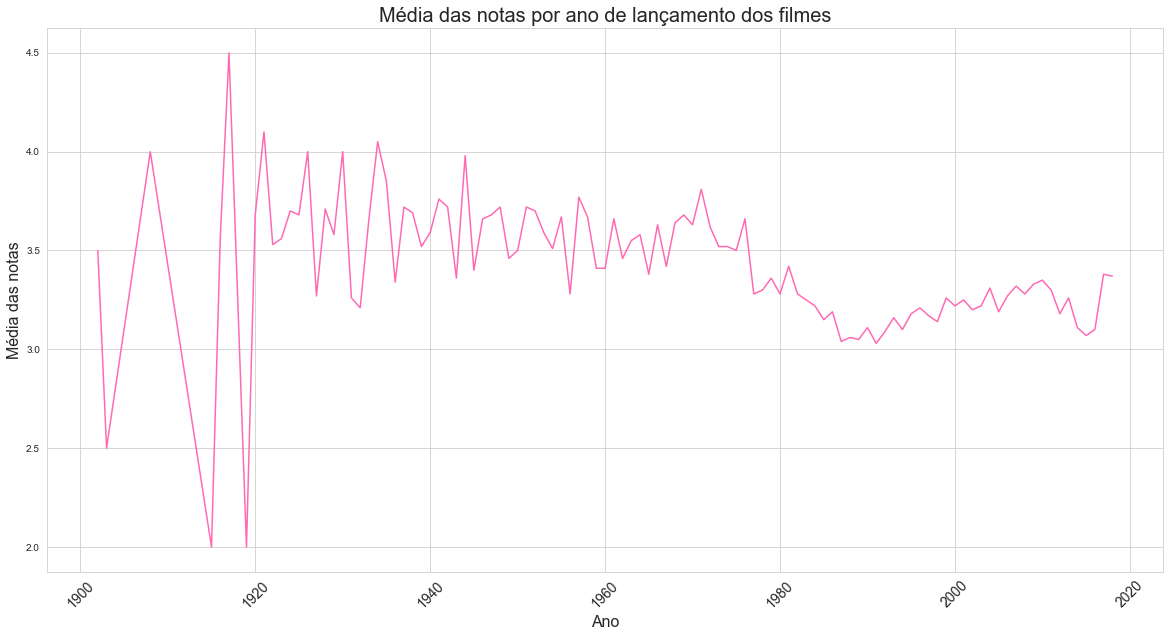

In [17]:
# Selecionando as médias das notas por ano de lançamento
medias_por_ano = filmes_com_ano.groupby("ano")["nota_media"].mean().round(2)

# Setando o estilo
sns.set_style('whitegrid')

# Tamanho da segunda figura
plt.figure(figsize=(20, 10))

# Plotando o gráfico de barra com a seaborn
sns.lineplot(x=medias_por_ano.index, y=medias_por_ano.values, color='#FF69B4')

# Definindo o título
plt.title('Média das notas por ano de lançamento dos filmes', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel("Ano", fontsize=16)

# Definindo o eixo vertical
plt.ylabel("Média das notas", fontsize=16)

# Rotacionando os gêneros em 45°
plt.xticks(fontsize=14, rotation=45)

# Mostras o gráfico
plt.show()